In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import tensorflow as tf
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import tensorflow_probability as tfp
from utils.plot import *
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

tfk = tf.keras
tfkl = tf.keras.layers
tfpl = tfp.layers
tfd = tfp.distributions
tfb = tfp.bijectors

# Model

In [26]:
state_time_derivative_fn = tfk.models.Sequential([
    tfkl.Input(shape=(1000, 1)),
    tfkl.Dense(50, activation='relu'),
    tfkl.Dense(1000, activation='relu'),
])

In [27]:
bijector = tfb.FFJORD(state_time_derivative_fn=state_time_derivative_fn)

In [37]:
x = tfd.Normal(loc=0, scale=1).sample((1000))

In [38]:
x.shape

TensorShape([1000])

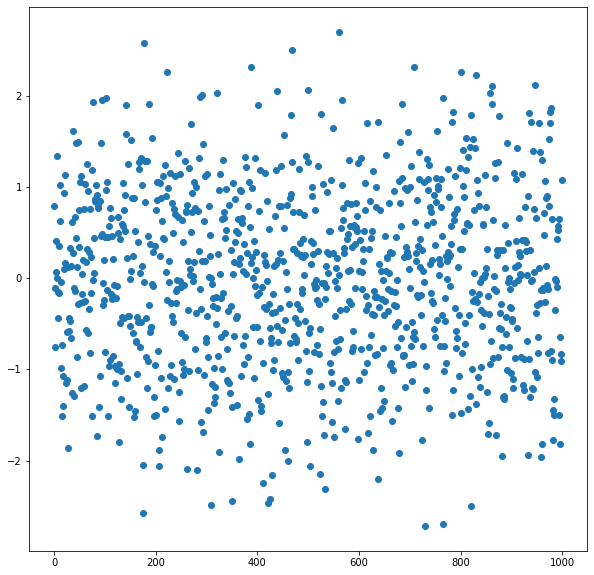

In [39]:
plt.scatter(np.linspace(0, 1000-1, 1000), x)

In [40]:
x.shape

TensorShape([1000])

In [41]:
y = bijector.forward(x)

IndexError: list index out of range